Here, we will observe 5 encryption systems:
1. RSA (Rivest–Shamir–Adleman)
2. Rabin cryptosystem
3. Digital Signature Algorithm (DSA)
4. ElGamal encryption system
5. Elliptic-curve cryptography (ECC)

Let's begin with RSA(Rivest–Shamir–Adleman):

RSA (Rivest-Shamir-Adleman) is a widely used cryptographic algorithm that is named after its inventors. RSA has widespread use in various applications, including secure communication protocols like SSL/TLS, secure email, digital certificates, secure file transfer, and secure remote access. 

In [38]:
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 51.4 kB/s eta 0:00:00a 0:00:01


In [39]:
from sympy import randprime
import math
import random
from random import randint
from PIL import Image
import numpy as np
from tinyec import registry
from Crypto.Cipher import AES
import hashlib, secrets, binascii
import secrets
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [43]:
def power(number, power_num, modulo):
    """
    >>> power(15, 98, 17)
    4"""
    result = 1
    temp_var = number % modulo
    while power_num > 0:
        if power_num % 2:
            result = (result * temp_var) % modulo
        temp_var = (temp_var * temp_var) % modulo
        power_num = power_num >> 1
    return result % modulo

class RSA:
    """Rsa algorithm for encryption"""
    def __init__(self, bits):
        self._public_key, self._private_key = self.keys_generator(bits)

    def get_public(self):
        """Get public key"""
        return self._public_key

    def get_private(self):
        """Get private key"""
        return self._private_key

    def eq_encrypt_decrypt(self, message):
        """Check if message and decrypt message is equal"""
        encrypt = self.encrypt_message(message)
        decrypt = self.decrypt_message(encrypt)
        return message == decrypt


    def keys_generator(self, bits = 256):
        """Generate public and private key for rsa algorithm"""
        if bits not in [32, 64, 128, 256, 512, 1024, 2048]:
            raise ValueError('Value of bits must be power of 2 from 32 to 2048')
        ceil, floor = 2 ** (bits//2), 2 ** (bits//2 + 1)
        prime_1 = randprime(ceil, floor)
        prime_2 = randprime(ceil, floor)
        prime_product = prime_1 * prime_2
        phi = (prime_1 - 1) * (prime_2 - 1)
        public = random.randint(1, phi)
        while math.gcd(public, phi) != 1:
            public = random.randint(1, phi)
        private = pow(public, -1, phi)
        return ((public, prime_product), (private, prime_product))

    def encrypt_message(self, message):
        """Encrypt message using private key"""
        encrypt = []
        for char in message:
            own_add = power(ord(char), self._public_key[0], self._public_key[1])
            encrypt.append(own_add)
        return encrypt

    def decrypt_message(self, encrypt_message):
        """Decrypt message using private key"""
        decrypted = []
        for elem in encrypt_message:
            decrypt_num = power(elem, self._private_key[0], self._private_key[1])
            decrypted.append(chr(decrypt_num))
        return ''.join(decrypted)


At first, let's check it on 32-bytes integers:

In [14]:
rsa = RSA(32)
message = 'hello, do you wanna talk about something?'
print(f"Public key - {rsa.get_public()}\n")
print(f"Private key - {rsa.get_private()}\n")
encrypt = rsa.encrypt_message(message)
print(f"Encrypt message - {encrypt}\n")
decrypt = rsa.decrypt_message(encrypt)
print(f'Decrypt message - {decrypt}\n')


Public key - (4751620985, 7418624093)

Private key - (4439720669, 7418624093)

Encrypt message - [1496779685, 1620542201, 3298656922, 3298656922, 5549589489, 4745867272, 5557179510, 5908173137, 5549589489, 5557179510, 3276969733, 5549589489, 6939027817, 5557179510, 2850053918, 829899365, 1185378981, 1185378981, 829899365, 5557179510, 1199733434, 829899365, 3298656922, 6618306245, 5557179510, 829899365, 992867669, 5549589489, 6939027817, 1199733434, 5557179510, 556385045, 5549589489, 3339059381, 1620542201, 1199733434, 1496779685, 4619610136, 1185378981, 4005227443, 3976186529]

Decrypt message - hello, do you wanna talk about something?

True


Now let's checkon 2048-bytes

In [15]:
rsa = RSA(2048)
message = 'hello'
print(f"Public key - {rsa.get_public()}\n")
print(f"Private key - {rsa.get_private()}\n")
encrypt = rsa.encrypt_message(message)
print(f"Encrypt message - {encrypt}\n")
decrypt = rsa.decrypt_message(encrypt)
print(f'Decrypt message - {decrypt}\n')

Public key - (14747086855933595247840909584271801048105730371848607689976792941782184288043076874230392736931738643891239070002032295218973885953360886132796845920651453285775732336598156836545885212959658064324108157903432335507790115490401505157653756051024900956972475322568444464618758688146597693947129304410644206182252074339010508125745492580704244783613519179017203158404461764586573054702537580023574030850182742307077304352861766249539252306544998417517144378947176044691541471533819768614800120584858769692472215130093542308054541606916514276574648936065731710748485591837977993486533163351885456939302821084427869349003, 5479701757696155649649816989786613687898751083534795583799988170187484874853133851322512940088070250818015341965266217187307509517546044209882624565303131811996473813226287269655984725646534123623386662734127059162096357206160686059349296721969548373932487939416157698952953226006786599615474647101368519543820435688950686002484456271826387686816294107145651287361799

What's the idea here? We begin with generating two keys - public and private. Both of them are tuples which includes prime_product - product of the prime numbers in given bytes range. Public key is a random number of phi function(Eiler's)'s product of this two numbers, and private key is the inverse of this number by given module.

Second algorithm is Rabin Cryptosystem:

The Rabin cryptosystem is a public-key encryption algorithm developed by Michael Rabin in 1979. The Rabin cryptosystem is considered an asymmetric encryption scheme, meaning it uses different keys for encryption and decryption. The Rabin cryptosystem has been used in various applications, including digital signatures, key exchange protocols, and secure communications. However, it is less widely used compared to other encryption algorithms like RSA, which also rely on the difficulty of factoring.

In [44]:
def n_bit_random(bitsize):
    """ Generates random integer with particular bitsize """
    return randint(2**bitsize, 2**(bitsize + 1))


def is_miller_rabin_passed(miller_rabin_candidate):
    '''Run 200 iterations of Rabin Miller Primality test'''

    maxDivisionsByTwo = 0
    evenComponent = miller_rabin_candidate-1

    while evenComponent % 2 == 0:
        evenComponent >>= 1
        maxDivisionsByTwo += 1
    assert(2**maxDivisionsByTwo * evenComponent == miller_rabin_candidate-1)

    def trialComposite(round_tester):
        if pow(round_tester, evenComponent,
            miller_rabin_candidate) == 1:
            return False
        for i in range(maxDivisionsByTwo):
            if pow(round_tester, 2**i * evenComponent,
                miller_rabin_candidate) == miller_rabin_candidate-1:
                return False
        return True

    # Set number of trials here
    numberOfRabinTrials = 200
    for i in range(numberOfRabinTrials):
        round_tester = random.randrange(2,
                    miller_rabin_candidate)
        if trialComposite(round_tester):
            return False
    return True

def generate_key(bitsize):
    """ Generate key which = 3mod4 and is prime with paricular bitsize """
    while True:
        number = randprime(2**bitsize, 2**(bitsize + 1))
        if number % 4 == 3:
            return number

def coeffs_gcd_extended(number1 , number2):
    """ Coeff using Euclide Algorithm """
    number1_save = number1
    number2_save = number2

    full_part = []

    while True:
        n_1 = max(number1, number2)
        n_2 = min(number1, number2)

        result = n_1 % n_2
        full_part.append(n_1 // n_2)

        if n_1 % n_2 == 0:
            break

        if number1 == n_1:
            number1 = result
            continue
        number2 = result

    s_0 = 1
    s_1 = 0
    t_0 = 0
    t_1 = 1

    index = 0
    while index != len(full_part) - 1:

        s_next = s_0 - full_part[index] * s_1
        s_0 = s_1
        s_1 = s_next

        t_next = t_0 - full_part[index] * t_1
        t_0 = t_1
        t_1 = t_next

        index += 1

    if number1_save < number2_save and abs(s_next) > abs(t_next):
        return s_next, t_next
    if number1_save > number2_save and abs(s_next) < abs(t_next):
        return s_next, t_next
    if number1_save < number2_save and abs(s_next) < abs(t_next):
        return t_next, s_next
    return t_next, s_next


class RabinCryptography:
    """ Rabin Cryptography """
    def generate_keys(self, bits):
        """ Generates two numbers which satisfies condition p, q = 3mod(4)"""
        self.__q_var = generate_key(bits)  #private key
        self.__p_var = generate_key(bits)  #private key
        while self.__p_var == self.__q_var:
            self.__q_var = generate_key(bits)

        return self.__q_var * self.__p_var

    def __init__(self, bits) -> None:
        self.n_var = self.generate_keys(bits)  #public key

    @staticmethod
    def encode(key, message):
        """ Encode message with passed key """
        send_coded = []

        for symbol in message:
            if isinstance(symbol, str):
                ord_symbol = ord(symbol)
            else:
                ord_symbol = symbol
            bin_symbol = bin(ord_symbol)[2:] * 2
            new_ord = int(bin_symbol, 2)
            new_bin = power(new_ord, 2, key)
            send_coded.append(new_bin)

        return send_coded

    def decode(self, message, image = False):
        """ Decode message using key and codded message """
        line = ""

        for symbol in message:
            m_p_var = power(symbol, (1 + self.__p_var) // 4, self.__p_var)
            m_q_var = power(symbol, (1 + self.__q_var) // 4, self.__q_var, )


            m_p_var_1 = self.__p_var - m_p_var
            m_q_var_1 = self.__q_var - m_q_var

            a_var, b_var = coeffs_gcd_extended(self.__p_var, self.__q_var)

            roots = []

            root_1 = (a_var * self.__p_var * m_q_var +\
                      b_var * self.__q_var * m_p_var) %\
                        (self.n_var)

            root_2 = (a_var * self.__p_var * m_q_var_1 +\
                      b_var * self.__q_var * m_p_var_1) %\
                        (self.n_var)

            root_3 = (a_var * self.__p_var * m_q_var_1 +\
                      b_var * self.__q_var * m_p_var) %\
                        (self.n_var)
            root_4 = (a_var * self.__p_var * m_q_var +\
                      b_var * self.__q_var * m_p_var_1) %\
                        (self.n_var)

            roots.append(bin(root_1)[2:])
            roots.append(bin(root_2)[2:])
            roots.append(bin(root_3)[2:])
            roots.append(bin(root_4)[2:])

            for root in roots:
                if len(root) % 2:
                    continue
                half = len(root) // 2
                if root[:half] == root[half:]:
                    if image:
                        line += str(int(root[:half], 2))
                    else:
                        line += chr(int(root[:half], 2))
                    break
        return line


In [36]:
rabin = RabinCryptography(1024)
message = 'How you doing bro? Has some news?'
print("Public key: " + str(rabin.n_var))
encoded = rabin.encode(rabin.n_var, message)
print('Encoded message:')
print(encoded)
print('Decode back:')
decoded = rabin.decode(encoded)
print(decoded == message)

Public key: 95326151451425446903600078507523389467201525468247166699971102073471833710581501444980914039660230234180865596038661298846667691973113971824060163108442055245044756377011557216138744859290258631233989021694451506488813914832342191556654539182011900728480803579445819228530159065344682483165543135043525889201777283500174279362069323033223491338806731185217045259840050137257848861157766266724889946515169313595444628848855364387295521107837135465037131159639780535594824228090532745370439819106888723298803992655915703478980723998508061163799664360921771266240266044037182592465004299691827371100404130219518315695601
Encoded message:
[86266944, 205033761, 235653201, 4326400, 243640881, 205033761, 227798649, 4326400, 166410000, 205033761, 183467025, 201356100, 176544369, 4326400, 159820164, 216266436, 205033761, 16769025, 4326400, 86266944, 156575169, 220077225, 4326400, 220077225, 205033761, 197711721, 169754841, 4326400, 201356100, 169754841, 235653201, 220077225, 16769025]
Decod

The main idea here is that we generate public key and private key. Public key is s product of two private keys(by default 50 bytes). The encoding is simple - we just take a binary representation of each symbol's ascii and take a module of it's square to our key.

Third encryption system is Digital Signature Algorithm (DSA). The Digital Signature Algorithm (DSA) is a widely used public-key cryptographic algorithm for generating and verifying digital signatures. It was developed by the National Institute of Standards and Technology (NIST) in the United States and published as a federal standard in 1994. DSA is commonly used for digital signatures in various applications, including secure communications, electronic transactions, software distribution, and authentication protocols. It provides a means for verifying the authenticity and integrity of digital data.

Let's check how it works:

In [45]:
def gcdExtended(a, b):
    """ Extended GCD Anlgorith """
    # Base Case
    if a == 0:
        return b, 0, 1

    gcd, x1, y1 = gcdExtended(b % a, a)

    # Update x and y using results of recursive
    # call
    x = y1 - (b // a) * x1
    y = x1

    return gcd, x, y

class DSA():
    """ Digital Signature Algorithm """
    def __init__(self) -> None:
        self.public, self.__private = self.keys()

    def add_signature(self, message):
        """ Adds digital signature to message
           and returns the same message with signature"""
        val_p,val_q, val_g, val_x = self.__private
        hash_of_object = int(hashlib.sha1(message.encode()).hexdigest(), 16)

        coeff = random.randint(0, val_q - 1)

        val_r = (((val_g**coeff) % val_p)) % val_q

        val_s = ((gcdExtended(coeff, val_q)[1]) *\
                 (hash_of_object + val_x * val_r)) % val_q
        return message, val_r, val_s

    def verify_signature(self, message_sign, public_key):
        """ Vetify signature and return True if valid and False if not """
        message, val_r, val_s = message_sign
        val_p,val_q, val_g, val_y = public_key
        hased_image = int(hashlib.sha1(message.encode()).hexdigest(), 16)

        a_1 = (hased_image * gcdExtended(val_s, val_q)[1]) % val_q
        a_2 = (gcdExtended(val_s, val_q)[1] * val_r) % val_q
        value = (((val_g**a_1) * (val_y**a_2)) % val_p) % val_q
        if value == val_r:
            return True
        return False

    def keys(self):
        """ Generates public and pivate keys """
        val_p = 1531447
        val_q = 5209
        val_h = 2
        val_g = int((val_h ** ((val_p - 1) / val_q)) % val_p)
        val_x = random.randint(0, val_q - 1)
        val_y = (val_g ** val_x) % val_p

        return [[val_p, val_q, val_g, val_y],
                 [val_p,val_q, val_g, val_x]]

In [46]:
def power(number, power_num, modulo):
    """
    >>> power(15, 98, 17)
    4"""
    result = 1
    temp_var = number % modulo

    while power_num > 0:
        if power_num % 2:
            result = (result * temp_var) % modulo
        temp_var = (temp_var * temp_var) % modulo
        power_num = power_num >> 1

    return result % modulo

class EIG:
    """
    Class for ElGamal Encryption Algorithm"""
    def __init__(self, bits):
        self._public_key, self._private_key = self.generate_keys(bits)
        self._large_number = self._public_key[1]

    def get_public(self):
        """Return public key"""
        return self._public_key

    def get_private(self):
        """Return private key"""
        return self._private_key

    def get_largenumber(self):
        """Return large number, that was generated"""
        return self._large_number

    def equal_encrypt_orig(self, message):
        """Check equalence of message and its decryption"""
        encrypt, p = self.encrypt_message(message, *self._public_key)

        decrypt = self.decrypt_message(encrypt, p, self.get_private(), self._large_number)
        return message == decrypt

    def generate_keys(self, bits):
        """Generate key for encryption
        Generate q = large number in size of bits variable
        Also generate g = range(1, q), which is basis for all power raising,
        a = range(1, q), gcd(a, q) = 1, a is a private key
        h = g^a(mod q)
        return public key = (h, q, g) and private key = a
        """

        large_number = random.randint(2**bits, 2**(bits + 1)) #generate random large number in size of bits variable
        g = random.randint(1, large_number) #generate random number from 1 to large number (g)

        key = random.randint(1, large_number) #also generate random number, its gcd with large number must be equal to 1, it is our private key (a)
        while math.gcd(key, large_number) != 1:
            key = random.randint(1, large_number)

        h = power(g, key, large_number) #raise g to the power of key modulo large_number (h = g^a variable)
        return (h, large_number, g), key #public key is tuple of h, large number and g, private key its number key (gcd(key, q) = 1)

    def encrypt_message(self: object, msg: str, h: int, large_number: int, g: int):
        """Encrypt message
        Require message, h = g^a(mod q), q = large number, g = random number
        Generate k = random number in range(1, q)
        Calculate p = g^k(mod q) will be needed for decryption
        Calculate s = h^k(mod q) = g^ak(mod q)
        Encrypt ord of message elements by multiplying its by s
        Return Encrypted message(list) and p = g^k(mod q)"""

        encrypt = []
        k = random.randint(1, large_number) # generate number k, gcd(k, large number) = 1
        while math.gcd(k, large_number) != 1:
            k = random.randint(1, large_number)

        p = power(g, k, large_number) #raise g to the power of k modulo large number (g^k, number to return after encryption)
        s = power(h, k, large_number) #raise h to the power of k modulo large number (g^ak, number for encryption)

        for elem in msg:
            encrypt.append(ord(elem) * s) #multiply ord of each letter element by g^ak

        return encrypt, p #return encrypt message(list) and p = g^k

    def decrypt_message(self, en_message, p, key, q):
        """Decrypt message
        Require encrypt message, p = g^k(mod q), a(private key), q = large number
        Find s = g^ak(mod q) from encryption  and divide all ecrypt elements by it
        Return Original message"""
        de_message = []

        s = power(p, key, q) #Find s = g^ak from encryption by raising p = g^k to the power of a modulo large number

        for elem in en_message:
            de_message.append(chr(int(elem / s))) #divide each encrypt element by s = g^ak and find its chr()

        return ''.join(de_message)

In [47]:
from tinyec import registry
import secrets

curve = registry.get_curve('brainpoolP256r1')

def compress_point(point):
    return hex(point.x) + hex(point.y % 2)[2:]

def ecc_calc_encryption_keys(pubKey):
    ciphertextPrivKey = secrets.randbelow(curve.field.n)
    ciphertextPubKey = ciphertextPrivKey * curve.g
    sharedECCKey = pubKey * ciphertextPrivKey
    return (sharedECCKey, ciphertextPubKey)

def ecc_calc_decryption_key(privKey, ciphertextPubKey):
    sharedECCKey = ciphertextPubKey * privKey
    return sharedECCKey

privKey = secrets.randbelow(curve.field.n)
pubKey = privKey * curve.g
print("private key:", hex(privKey))
print("public key:", compress_point(pubKey))

(encryptKey, ciphertextPubKey) = ecc_calc_encryption_keys(pubKey)
print("ciphertext pubKey:", compress_point(ciphertextPubKey))
print("encryption key:", compress_point(encryptKey))

decryptKey = ecc_calc_decryption_key(privKey, ciphertextPubKey)
print("decryption key:", compress_point(decryptKey))

private key: 0x79ee51fe53258a64863a26f5ac3b5cd3a2c4da31f9dbd0ab81f041e47126628c
public key: 0x94a55e4d63c0059e444de7679a8c0af6ca5a74a47fdfaaa754df5df65f8337fa1
ciphertext pubKey: 0x415932537bbca571c347c8e5d6da9638af98da47d6275bb3c6afba983fbc90191
encryption key: 0xa49c870acd288f17994b752d4d6e83995904284b23393df403e40eb396ae331f0
decryption key: 0xa49c870acd288f17994b752d4d6e83995904284b23393df403e40eb396ae331f0


In [48]:
from tinyec import registry
from Crypto.Cipher import AES
import hashlib, secrets, binascii

def encrypt_AES_GCM(msg, secretKey):
    aesCipher = AES.new(secretKey, AES.MODE_GCM)
    ciphertext, authTag = aesCipher.encrypt_and_digest(msg)
    return (ciphertext, aesCipher.nonce, authTag)

def decrypt_AES_GCM(ciphertext, nonce, authTag, secretKey):
    aesCipher = AES.new(secretKey, AES.MODE_GCM, nonce)
    plaintext = aesCipher.decrypt_and_verify(ciphertext, authTag)
    return plaintext

def ecc_point_to_256_bit_key(point):
    sha = hashlib.sha256(int.to_bytes(point.x, 32, 'big'))
    sha.update(int.to_bytes(point.y, 32, 'big'))
    return sha.digest()

curve = registry.get_curve('brainpoolP256r1')

def encrypt_ECC(msg, pubKey):
    ciphertextPrivKey = secrets.randbelow(curve.field.n)
    sharedECCKey = ciphertextPrivKey * pubKey
    secretKey = ecc_point_to_256_bit_key(sharedECCKey)
    ciphertext, nonce, authTag = encrypt_AES_GCM(msg, secretKey)
    ciphertextPubKey = ciphertextPrivKey * curve.g
    return (ciphertext, nonce, authTag, ciphertextPubKey)

def decrypt_ECC(encryptedMsg, privKey):
    (ciphertext, nonce, authTag, ciphertextPubKey) = encryptedMsg
    sharedECCKey = privKey * ciphertextPubKey
    secretKey = ecc_point_to_256_bit_key(sharedECCKey)
    plaintext = decrypt_AES_GCM(ciphertext, nonce, authTag, secretKey)
    return plaintext

msg = b'Text to be encrypted by ECC public key and ' \
      b'decrypted by its corresponding ECC private key'
print("original msg:", msg)
privKey = secrets.randbelow(curve.field.n)
pubKey = privKey * curve.g

encryptedMsg = encrypt_ECC(msg, pubKey)
encryptedMsgObj = {
    'ciphertext': binascii.hexlify(encryptedMsg[0]),
    'nonce': binascii.hexlify(encryptedMsg[1]),
    'authTag': binascii.hexlify(encryptedMsg[2]),
    'ciphertextPubKey': hex(encryptedMsg[3].x) + hex(encryptedMsg[3].y % 2)[2:]
}
print("encrypted msg:", encryptedMsgObj)

decryptedMsg = decrypt_ECC(encryptedMsg, privKey)
print("decrypted msg:", decryptedMsg)

original msg: b'Text to be encrypted by ECC public key and decrypted by its corresponding ECC private key'
encrypted msg: {'ciphertext': b'5932d13877c570f95753fac7f86628bdc24b017a4a5d07362c45ecc90da49e512253bcc6170a99e777654e6a847ae8d82e94361c8308126076158687238a50d6c4fcaa99b7fc1cdec9d8322280746c299c0902403cd3ea1d1d', 'nonce': b'e32ce06766aa6ddf06920ad8c4fc6310', 'authTag': b'c288c5676d8996a9c671980b7f53c491', 'ciphertextPubKey': '0x68ed0215959a592edc1d3fe43a411d4341fe94b8481a5d83aa438bd5b89b0e6e1'}
decrypted msg: b'Text to be encrypted by ECC public key and decrypted by its corresponding ECC private key'


In [10]:
dsa = DSA()
key = dsa.public
print("Key:")
print(key)

signature = dsa.add_signature("hello, that's message to test!")
print(signature)
signature = (signature[0], signature[1], signature[2])
print("Changing initial message:")
print(signature)
print("Checking if they're the same:")
result = dsa.verify_signature(signature, key)
print(result)

Key:
[1531447, 5209, 1056444, 556872]
("hello, that's message to test!", 428, 3781)
Changing initial message:
("hello, that's message to test!", 428, 3781)
Checking if they're the same:
True


The main idea here is that we don't crypt the message, we add a special "signature" to it. So, if user will change the initial message we will now about it with help of RSA.

Comparison

In [57]:
def to_compare(bits):
    NUM_OF_ITERATIONS = 100
    time_taken_enc_rsa = 0
    time_taken_dec_rsa = 0
    time_taken_tot_rsa = 0
    time_taken_enc_rabin = 0
    time_taken_dec_rabin = 0
    time_taken_tot_rabin = 0
    time_taken_enc_eig = 0
    time_taken_dec_eig = 0
    time_taken_tot_eig = 0
    # time_taken_enc_rsa = 0
    # time_taken_dec_rsa = 0
    # time_taken_tot_rsa = 0
    message = 'abcdefghijklmnopqrstuvwxyz123456789'
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        
        #RSA time measuring
        rsa = RSA(bits)
        start_encrypt_rsa = time.time()
        encrypt_rsa = rsa.encrypt_message(message)
        end_encrypt_rsa = time.time()
        start_decrypt_rsa = time.time()
        decrypt_rsa = rsa.decrypt_message(encrypt_rsa)
        end_decrypt_rsa = time.time()
        if message != decrypt_rsa:
            print("RSA uncorrect decrypt")
        time_taken_enc_rsa += end_encrypt_rsa - start_encrypt_rsa
        time_taken_dec_rsa += end_decrypt_rsa - start_decrypt_rsa
        time_taken_tot_rsa += end_decrypt_rsa - start_encrypt_rsa


        #Rabin time measuring
        rabin = RabinCryptography(bits)
        start_encrypt_rabin = time.time()
        encoded_rabin = rabin.encode(rabin.n_var, message)
        end_encrypt_rabin = time.time()
        start_decrypt_rabin = time.time()
        decoded_rabin = rabin.decode(encoded_rabin)
        end_decrypt_rabin = time.time()
        if message != decoded_rabin:
            print("Rabin uncorrect decrypt")
        time_taken_enc_rabin += end_encrypt_rabin - start_encrypt_rabin
        time_taken_dec_rabin += end_decrypt_rabin - start_decrypt_rabin
        time_taken_tot_rabin += end_decrypt_rabin - start_encrypt_rabin 


        eig = EIG(bits)
        start_encrypt_eig = time.time()
        encrypt_eig, p = eig.encrypt_message(message, *eig.get_public())
        end_encrypt_eig = time.time()
        start_decrypt_eig = time.time()
        decrypt_eig = eig.decrypt_message(encrypt_eig, p, eig.get_private(), eig.get_largenumber())
        end_decrypt_eig = time.time()
        if message != decrypt_eig:
            print("EIG uncorrect decrypt")
        time_taken_enc_eig += end_encrypt_eig - start_encrypt_eig
        time_taken_dec_eig += end_decrypt_eig - start_decrypt_eig
        time_taken_tot_eig += end_decrypt_eig - start_encrypt_eig
        

        
        


        
    return(time_taken_enc_rsa/NUM_OF_ITERATIONS, time_taken_enc_rabin/NUM_OF_ITERATIONS, time_taken_enc_eig/NUM_OF_ITERATIONS),\
(time_taken_dec_rsa/NUM_OF_ITERATIONS, time_taken_dec_rabin/NUM_OF_ITERATIONS, time_taken_dec_eig/NUM_OF_ITERATIONS),\
(time_taken_tot_rsa/NUM_OF_ITERATIONS, time_taken_tot_rabin/NUM_OF_ITERATIONS, time_taken_tot_eig/NUM_OF_ITERATIONS)

In [58]:
bits = [32, 64, 128, 256, 512, 1024]
enc_rsa = []
enc_rabin = []
enc_eig = []
dec_rsa = []
dec_rabin = []
dec_eig = []
tot_rsa = []
tot_rabin = []
tot_eig = []
for bit in bits:
  enc, dec, tot = to_compare(bit)
  enc_rsa.append(enc[0])
  enc_rabin.append(enc[1])
  enc_eig.append(enc[2])
  dec_rsa.append(dec[0])
  dec_rabin.append(dec[1])
  dec_eig.append(dec[2])
  tot_rsa.append(tot[0])
  tot_rabin.append(tot[1])
  tot_eig.append(tot[2])



100%|██████████| 100/100 [03:46<00:00,  2.26s/it]


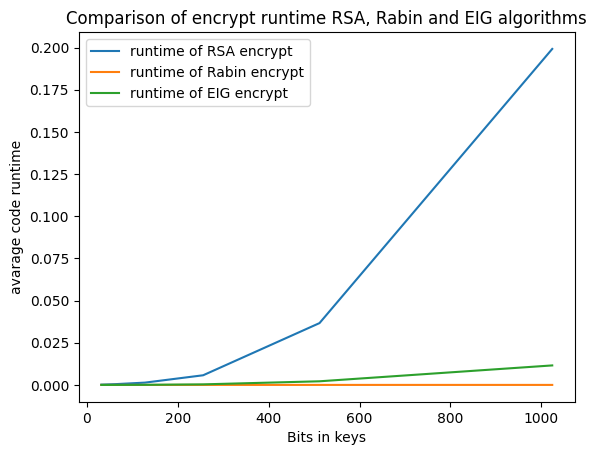

In [59]:
plt.plot(bits, enc_rsa, label ='runtime of RSA encrypt')
plt.plot(bits, enc_rabin, label ='runtime of Rabin encrypt')
plt.plot(bits, enc_eig, label ='runtime of EIG encrypt')
plt.xlabel('Bits in keys')
plt.ylabel('avarage code runtime')
plt.title("Comparison of encrypt runtime RSA, Rabin and EIG algorithms")
plt.legend()

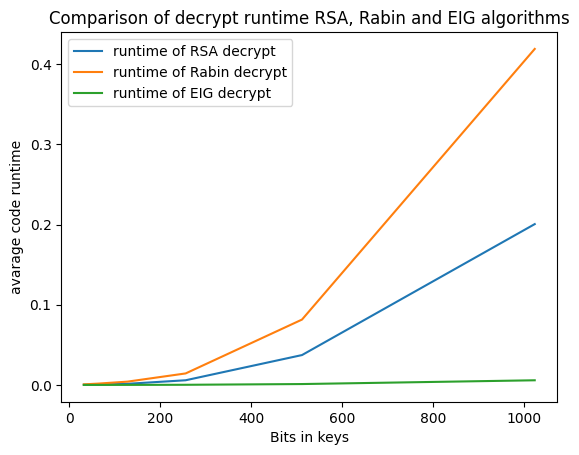

In [60]:
plt.plot(bits, dec_rsa, label ='runtime of RSA decrypt')
plt.plot(bits, dec_rabin, label ='runtime of Rabin decrypt')
plt.plot(bits, dec_eig, label ='runtime of EIG decrypt')
plt.xlabel('Bits in keys')
plt.ylabel('avarage code runtime')
plt.title("Comparison of decrypt runtime RSA, Rabin and EIG algorithms")
plt.legend()

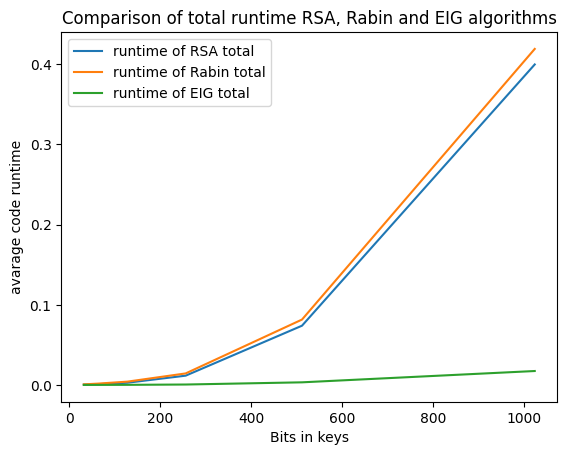

In [61]:
plt.plot(bits, tot_rsa, label ='runtime of RSA total')
plt.plot(bits, tot_rabin, label ='runtime of Rabin total')
plt.plot(bits, tot_eig, label ='runtime of EIG total')
plt.xlabel('Bits in keys')
plt.ylabel('avarage code runtime')
plt.title("Comparison of total runtime RSA, Rabin and EIG algorithms")
plt.legend()